#Dimensionality Reduction-PCA In Depth

PCA is an crazy awesome and useful linear dimensionality reduction technique

In [6]:
from __future__ import print_function, divison

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy as sp
print('scipy:', sp.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import matplotlib.pyplot as plt

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import pandas as pd
print('pandas', pd.__version__)

SyntaxError: future feature divison is not defined (<ipython-input-6-0c280ab43325>, line 1)

In [5]:
seaborn.set()

##PCA Introduction

PCA is a powerful method for unspervised learning for data _dimensionality reduction_. Easiest to visualize looking at 2d dataset

In [7]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2,2)), np.random.normal(size=(2,200))).T

In [9]:
XDF = pd.DataFrame(X)

In [10]:
print('shape of XDF:', XDF.shape)

shape of XDF: (200, 2)


(-3.0, 3.0, -1.0, 1.0)

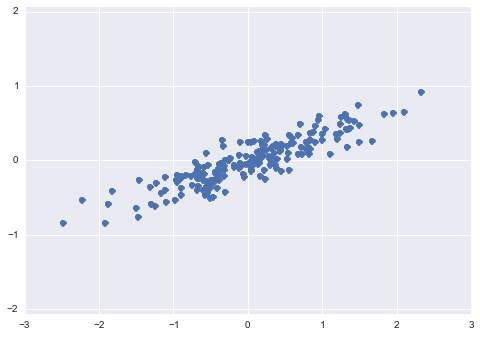

In [28]:
plt.plot(XDF.loc[:, 0], XDF.loc[:,1] ,'o')
plt.axis('equal')

Pretty clear we have a trend in our data here. PCA is a method that tries to find the **Principal Axis** in the data and explain how important those axes are in describing the data distribution. 

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)


[ 0.75871884  0.01838551]


In [32]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


Look at what these numbers mean by viewing them as vectors plotted on top of the data:

(-3.0, 3.0, -1.0, 1.0)

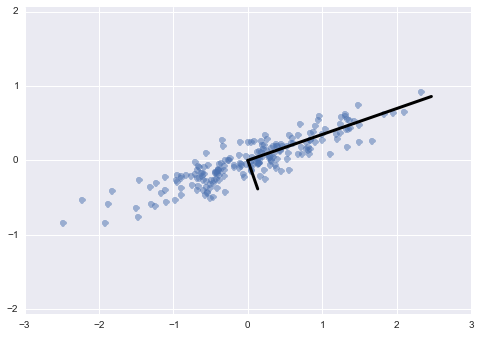

In [41]:
plt.plot(XDF.loc[:, 0], XDF.loc[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')

So we have two vectors here where one is longer than the other. This tells us that the longer vector direction is in someway 'more important' than the other one. The explained variance quantifies the measure of 'importance' in direction.

An alternative way to think about this is that the second principal component (the shorter vector) could be **completely ignored** without much loss of imformation. A cool thing to do is take a look at our data if we only keep 95% of the variance 

In [44]:
clf = PCA(0.95) #keep 95% of the variance 
X_trans = clf.fit_transform(X)

In [46]:
X_transDF = pd.DataFrame(X_trans)

In [49]:
print('x trans shape', X_transDF.shape)
print('x shape', X.shape)

x trans shape (200, 1)
x shape (200, 2)


So we specified that we wanted to throw away 5% of the variance. The data is now compressed by a factor of 50% which is pretty crazy. Lets take a look at what our data looks like after compression. 

In [51]:
XNew = clf.inverse_transform(X_transDF)

In [54]:
XNewDF = pd.DataFrame(XNew)

(-3.0, 3.0, -1.0, 1.0)

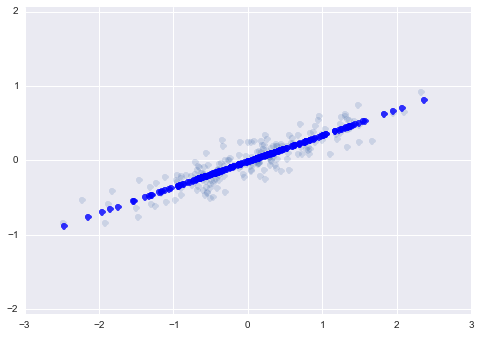

In [57]:
plt.plot(XDF.loc[:, 0], XDF.loc[:, 1], 'o', alpha=0.2)
plt.plot(XNewDF.loc[:, 0], XNewDF.loc[:, 1], 'ob', alpha=0.8)
plt.axis('equal')

Original data are the light points, dark points are data post PCA (the projected version). By truncating just five percent of the dataset and then reprojecting it the 'most important' features of the data are maintained and we have compressed the data by 50%!

So this is the sense in which dimensionality reduction works: if we can approximate the data set into a lower dimension, we will often have an easier time visualizing it or fitting it to complicated models of the data. 

###Application of PCA to Digits

The dimensionality reduction might seem a bit abstract in two dimensions but the projection and the dimensionality reduction can be cray useful when visualizing really high dimensional data. 

Lets take a look at application of PCA to our good ol digit data

In [58]:
from sklearn.datasets import load_digits 

In [63]:
digits = load_digits()
xDigitDF = pd.DataFrame(digits.data)
yDigitSeries = pd.Series(digits.target)
digitNames = digits.target_names

In [64]:
print('shape of xDigigDF', xDigitDF.shape)
print('shape of yDigitSeries', yDigitSeries.shape)

shape of xDigigDF (1797, 64)
shape of yDigitSeries (1797,)


In [65]:
digitPCA = PCA(2) # project from 64 down to 2 dimensions (wonder how we decide on this)

In [70]:
XProjectionDF = pd.DataFrame(pca.fit_transform(xDigitDF))

In [73]:
print('shapeof X', xDigitDF.shape)
print('shape of XProjection', XProjectionDF.shape)

shapeof X (1797, 64)
shape of XProjection (1797, 2)


<matplotlib.colorbar.Colorbar instance at 0x10b983320>

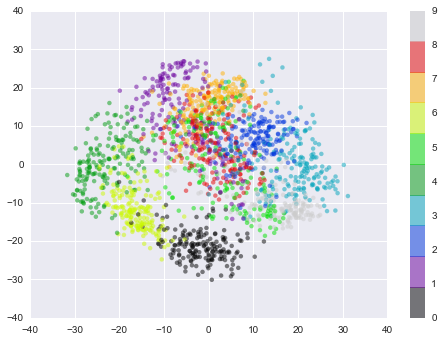

In [84]:
plt.scatter(XProjectionDF.loc[:, 0], XProjectionDF.loc[:, 1], c=yDigitSeries, alpha=0.5, edgecolor='none', s=20, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

So now we get to see the relationship between the digits. The PCA has given us the best stretch and rotation in our 64-dimensional feature space that allows us to actually see the layout of the digits **without** reference to the labels.



###Components Interpretation

We also love PCA because it has a super awesome and intuitive interpretation via _eigenvectors_. The input data is essentially represented as a vector. For our data we have

x=[x1, x2, x3....xn]

which really means _image(x) = x1*(pixel 1) + x2*(pixel2) + ....... 

If we reduce the dimensionality in the pixel space to (say 6) then we recover only a partial image

In [85]:
from fig_code.figures import plot_image_components

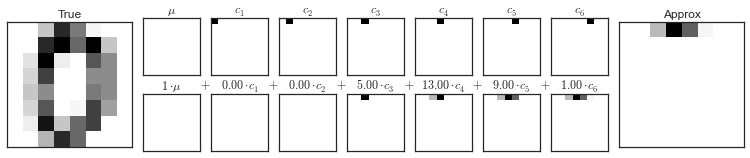

In [88]:
seaborn.set_style('white')
plot_image_components(digits.data[0])

The above is a pixel-wise representation (pixels are the featues). But we can do other representations! Basically we can use other **basic functions** and write something like:

_image(x)= mean+ x1(basis 1) + x2(basis 2) + x3(basis 3) ............_

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation. The low-dimensional representations of our data is the coefficients of this series and the approximate reconstruction is the result of the sum:


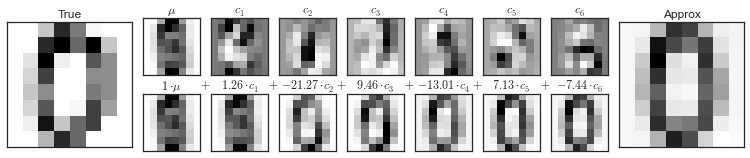

In [89]:
from fig_code import plot_pca_interactive
plot_pca_interactive(digits.data)

Here we get to see that with only six PCA components we can actually recover a reasonable approximation of the input! 

So the PCA can be viewed from two angles. It can be viewed as **dimensionality reduction** or it can be viewed as a form of **lossy data compression** where the loss favors noise (like we just saw right above). So we can actually use this second method to use PCA as a **filtering** process as well.


###Choosing the Number of Components

The key question we should have now is how much information have we thrown away? Lets check this out by looking at the **explained variance** as a function of the components:

In [90]:
seaborn.set()

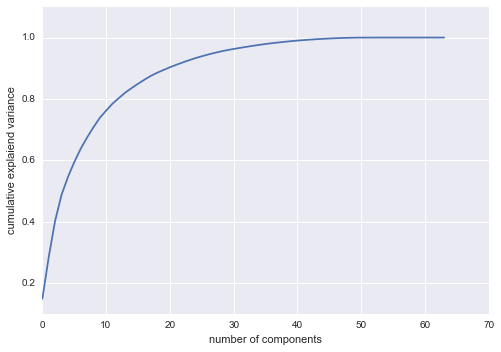

In [94]:
pca = PCA().fit(xDigitDF)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explaiend variance')

This graph shows us that our 2d projection loses a ton of information  (explaiend by the measured variance) and so we need roughly 20 components to retain 90% of the variance of our digit data. Looking at a plot like this for high dimensional datasets are awesome because it lets you understand the level of redudancy present in multiple observations. 

####PCA as Data Compression

PCA is surprisingly crazy useful for data compression. We just have to specify a small n_components parameter and that would allow us to reperesnt high dimensional point as a sum of just a few principal vectors.

Lets take a look at what a single digit looks like as we change the number of components

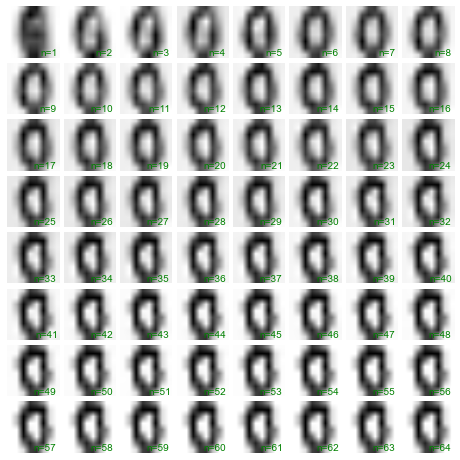

In [97]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    pca = PCA(i+1).fit(xDigitDF)
    im = pca.inverse_transform(pca.transform(xDigitsDF[20:21]))
    
    ax.imshow(im.reshape(8,8), cmap='binary')
    ax.text(0.95, 0.05, 'n={0}'.format(i+1), ha='right', transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Cool so this is one digit, we can use Interact to look at several digits at the same time.

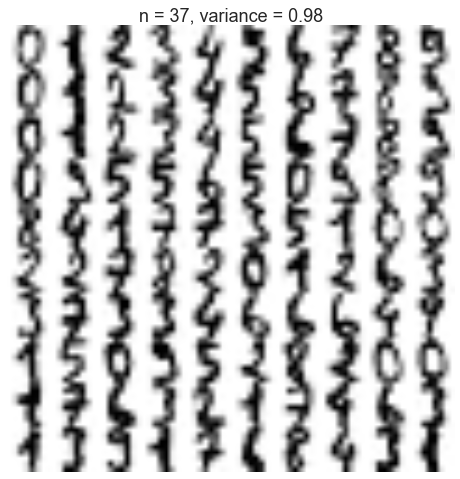

In [103]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8,8))
    plt.subplot(1,1,1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(xDigitDF)
    Xproj = pca.inverse_transform(pca.transform(xDigitDF[:nside**2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8,8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i,j] for j in range(nside)]) for i in range(nside)])
    
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
interact(plot_digits, n_components=[1,64], nside=[1,8])